# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [21]:
cities

['puerto ayora',
 'avarua',
 'colomi',
 'nyurba',
 'vaini',
 'lebu',
 'hermanus',
 'mataura',
 'ushuaia',
 'mingyue',
 'mikhaylovka',
 'quatre cocos',
 'port blair',
 'port alfred',
 'rikitea',
 'albany',
 'illoqqortoormiut',
 'cidreira',
 'carnarvon',
 'hilo',
 'gotsu',
 'castro',
 'vostok',
 'haines junction',
 'jega',
 'punta arenas',
 'busselton',
 'kapaa',
 'qaanaaq',
 'dabou',
 'balkhash',
 'ayan',
 'ngunguru',
 'bredasdorp',
 'tuktoyaktuk',
 'dunedin',
 'tongliao',
 'acari',
 'grand river south east',
 'kawana waters',
 'svetlyy',
 'dakar',
 'raesfeld',
 'georgetown',
 'bluff',
 'katsuura',
 'gzhatsk',
 'kavieng',
 'atuona',
 'tasiilaq',
 'tres arroyos',
 'skjervoy',
 'cape town',
 'bengkulu',
 'norman wells',
 'ixtapa',
 'sangar',
 'belushya guba',
 'kaitangata',
 'hobart',
 'mayo',
 'ponta do sol',
 'ambon',
 'samarai',
 'shelburne',
 'luderitz',
 'fivizzano',
 'butaritari',
 'muros',
 'guerrero negro',
 'upernavik',
 'arraial do cabo',
 'barrow',
 'apple valley',
 'wahpeton',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
#Loop through the list of cities and perform a request for data on each
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#define lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
  
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
        print(f'Processing Record {len(city_name)} | {city}')
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 | puerto ayora
Processing Record 2 | avarua
Processing Record 3 | colomi
Processing Record 4 | nyurba
Processing Record 5 | vaini
Processing Record 6 | lebu
Processing Record 7 | hermanus
Processing Record 8 | mataura
Processing Record 9 | ushuaia
Processing Record 10 | mingyue
Processing Record 11 | mikhaylovka
Processing Record 12 | quatre cocos
Processing Record 13 | port blair
Processing Record 14 | port alfred
Processing Record 15 | rikitea
Processing Record 16 | albany
City not found. Skipping...
Processing Record 17 | cidreira
Processing Record 18 | carnarvon
Processing Record 19 | hilo
Processing Record 20 | gotsu
Processing Record 21 | castro
Processing Record 22 | vostok
Processing Record 23 | haines junction
Processing Record 24 | jega
Processing Record 25 | punta arenas
Processing Record 26 | busselton
Processing Record 27 | kapaa
Processing Record 28 | qaanaaq
Processing Record 29 | dabou
Processing

Processing Record 233 | chicama
Processing Record 234 | wasilla
Processing Record 235 | maceio
Processing Record 236 | buy
Processing Record 237 | qaqortoq
Processing Record 238 | sioux lookout
Processing Record 239 | esperance
Processing Record 240 | asau
Processing Record 241 | rumonge
Processing Record 242 | severo-kurilsk
Processing Record 243 | nanzhou
Processing Record 244 | narsaq
Processing Record 245 | yatou
Processing Record 246 | clyde river
Processing Record 247 | belyy yar
City not found. Skipping...
Processing Record 248 | madimba
Processing Record 249 | thompson
Processing Record 250 | dashitou
Processing Record 251 | saldanha
Processing Record 252 | kununurra
Processing Record 253 | okhotsk
City not found. Skipping...
Processing Record 254 | martin
Processing Record 255 | cabo san lucas
Processing Record 256 | kanadukathan
Processing Record 257 | bonthe
City not found. Skipping...
Processing Record 258 | zapolyarnyy
Processing Record 259 | harper
Processing Record 260 |

Processing Record 468 | mitzic
Processing Record 469 | richards bay
Processing Record 470 | kang
Processing Record 471 | ust-maya
Processing Record 472 | codajas
Processing Record 473 | gat
Processing Record 474 | namibe
City not found. Skipping...
Processing Record 475 | ambilobe
Processing Record 476 | alyangula
Processing Record 477 | hammerfest
City not found. Skipping...
Processing Record 478 | itoman
Processing Record 479 | victor harbor
Processing Record 480 | mosquera
Processing Record 481 | araouane
Processing Record 482 | tazovskiy
Processing Record 483 | antigonish
Processing Record 484 | nalut
Processing Record 485 | riberalta
Processing Record 486 | acajutla
Processing Record 487 | karratha
Processing Record 488 | mahanoro
Processing Record 489 | tura
Processing Record 490 | nome
Processing Record 491 | saint-leu
Processing Record 492 | da lat
Processing Record 493 | egvekinot
Processing Record 494 | mount gambier
Processing Record 495 | olga
Processing Record 496 | mirafl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_dict = {"City": city_name, "Lat": lat, "Lng": lng,
                "Max Temp": max_temp, "Humidity": humidity, 
                "Cloudiness" : cloudiness, "Wind Speed": wind_speed,
                "Country": country, "Date": date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,82.40,69,20,16.11,EC,1619391134
1,avarua,-21.2078,-159.7750,82.40,78,40,12.66,CK,1619391284
2,colomi,-17.3500,-65.8667,68.00,37,20,9.22,BO,1619391637
3,nyurba,63.2842,118.3319,33.12,92,100,5.82,RU,1619391637
4,vaini,-21.2000,-175.2000,78.80,89,75,5.75,TO,1619391141


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
weather_data.sort_values(by='Humidity', ascending=False).head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
169,klaksvik,62.2266,-6.5890,44.60,100,100,11.50,FO,1619391592
493,mount gambier,-37.8333,140.7667,51.80,100,90,5.75,AU,1619391370
289,valparaiso,-33.0393,-71.6273,55.99,100,0,9.53,CL,1619391811
382,ordu,40.9086,37.6845,51.80,100,75,6.91,TR,1619391851
245,clyde river,70.4692,-68.5914,21.20,100,75,27.63,CA,1619391398
544,kuala terengganu,5.3302,103.1408,77.00,100,20,2.30,MY,1619391929
231,vestmanna,62.1564,-7.1664,44.60,100,100,11.50,FO,1619391625
140,chapais,49.7834,-74.8492,32.00,100,90,10.36,CA,1619391549
475,alyangula,-13.8483,136.4192,75.20,100,40,11.48,AU,1619391891
146,kysyl-syr,63.8986,122.7617,33.64,99,100,4.76,RU,1619391581


In [29]:
# No cities higher than 100% humidity

weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

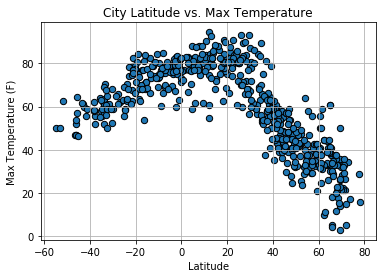

In [30]:
weather_data.plot.scatter(x='Lat', y='Max Temp', s=40, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

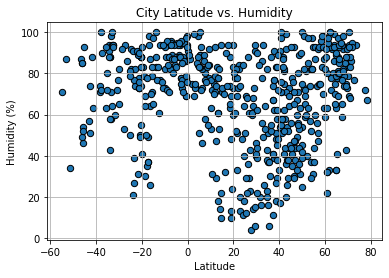

In [31]:
weather_data.plot.scatter(x='Lat', y='Humidity', s=40, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

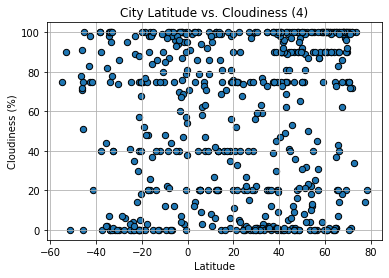

In [32]:
weather_data.plot.scatter(x='Lat', y='Cloudiness', s=40, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Cloudiness (4)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

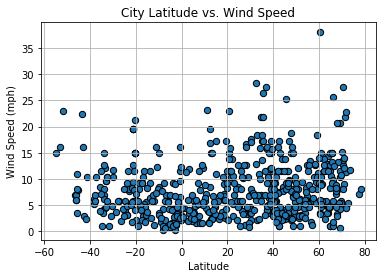

In [33]:
weather_data.plot.scatter(x='Lat', y='Wind Speed', s=40, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7636042579076725


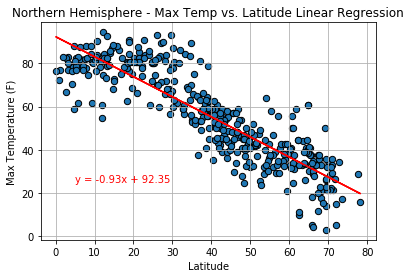

In [39]:
#Get the northern hemisphere data only
north_hemi_df = weather_data.loc[weather_data['Lat'] >= 0]

#create variables for measurements
lat_list = north_hemi_df['Lat']
temp_list = north_hemi_df['Max Temp']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, temp_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
north_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(5,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5832222096321454


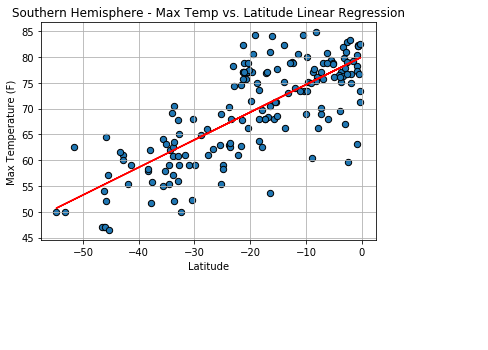

In [51]:
#Get the southern hemisphere data only
south_hemi_df = weather_data.loc[weather_data['Lat'] < 0]

#create variables for measurements
lat_list = south_hemi_df['Lat']
temp_list = south_hemi_df['Max Temp']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, temp_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
south_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(5,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.026458998414257456


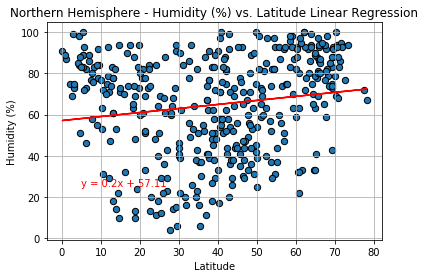

In [43]:
#Get the northern hemisphere data only
north_hemi_df = weather_data.loc[weather_data['Lat'] >= 0]

#create variables for measurements
lat_list = north_hemi_df['Lat']
humid_list = north_hemi_df['Humidity']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, humid_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
north_hemi_df.plot.scatter(x='Lat', y='Humidity', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(5,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06522505017100795


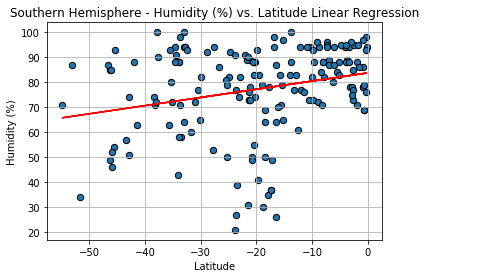

In [50]:
#Get the southern hemisphere data only
south_hemi_df = weather_data.loc[weather_data['Lat'] < 0]

#create variables for measurements
lat_list = south_hemi_df['Lat']
humid_list = south_hemi_df['Humidity']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, humid_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
south_hemi_df.plot.scatter(x='Lat', y='Humidity', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(5,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.018265810046932226


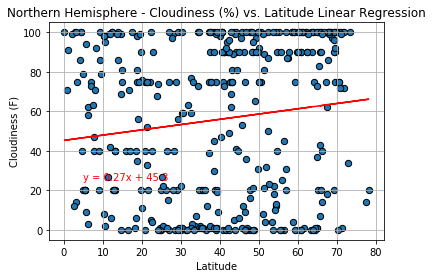

In [47]:
#Get the northern hemisphere data only
north_hemi_df = weather_data.loc[weather_data['Lat'] >= 0]

#create variables for measurements
lat_list = north_hemi_df['Lat']
cloud_list = north_hemi_df['Cloudiness']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, cloud_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
north_hemi_df.plot.scatter(x='Lat', y='Cloudiness', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (F)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(5,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006760747763155206


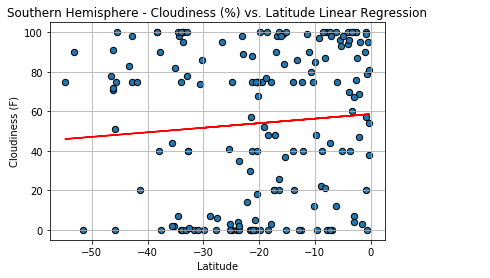

In [49]:
#Get the southern hemisphere data only
south_hemi_df = weather_data.loc[weather_data['Lat'] < 0]

#create variables for measurements
lat_list = south_hemi_df['Lat']
cloud_list = south_hemi_df['Cloudiness']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, cloud_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
south_hemi_df.plot.scatter(x='Lat', y='Cloudiness', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (F)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(5,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.023871336928264448


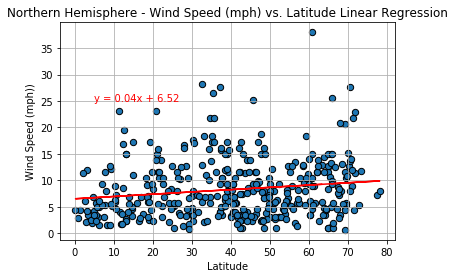

In [54]:
#Get the northern hemisphere data only
north_hemi_df = weather_data.loc[weather_data['Lat'] >= 0]

#create variables for measurements
lat_list = north_hemi_df['Lat']
wind_list = north_hemi_df['Wind Speed']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, wind_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
north_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(5,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10183845190950697


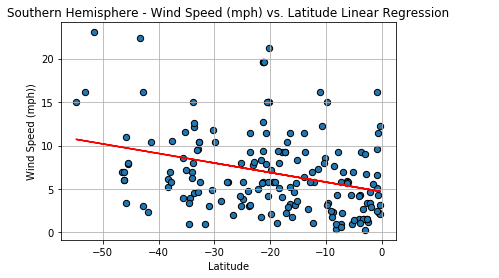

In [52]:
#Get the southern hemisphere data only
south_hemi_df = weather_data.loc[weather_data['Lat'] < 0]

#create variables for measurements
lat_list = south_hemi_df['Lat']
wind_list = south_hemi_df['Wind Speed']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, wind_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
south_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(5,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()